In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel

plots_folder = 'plots/explore_gaussian_process_2d/'

In [20]:

# equilateral triangle
X = [[-0.5, -np.sqrt(3)*0.5/3], [0.5, -np.sqrt(3)*0.5/3], [0,np.sqrt(3)*0.5*2/3], [0, 0]]
X = np.array(X)

# create meshgrid
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1, x2)
X_mesh = np.vstack((x1.flatten(), x2.flatten())).T

y = [10] * len(X)
y = np.array(y)

In [21]:

kernel = RBF(length_scale=0.5, length_scale_bounds='fixed')
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X, y)

GaussianProcessRegressor(kernel=RBF(length_scale=0.5), n_restarts_optimizer=9)

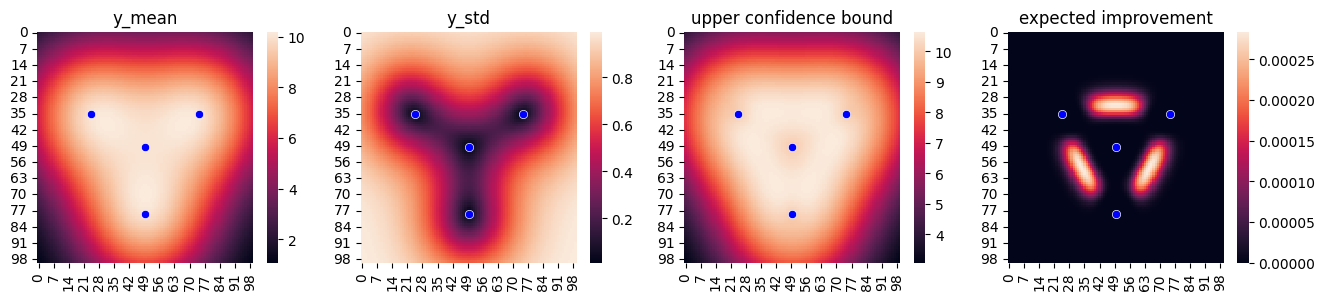

In [22]:
from scipy.stats import norm

y_mean, y_std = gaussian_process.predict(X_mesh, return_std=True)
y_mean = y_mean.reshape(x1.shape)
y_std = y_std.reshape(x1.shape)

mu_sample_opt = 10

xi = 1

imp = y_mean - mu_sample_opt - xi
Z = imp / y_std
ei = imp * norm.cdf(Z) + y_std * norm.pdf(Z)
ei[y_std == 0.0] = 0.0

fig, ax = plt.subplots(1, 4, figsize=(16, 3))

sns.heatmap(y_mean, ax=ax[0])
sns.heatmap(y_std, ax=ax[1])
sns.heatmap(y_mean + 2 * y_std, ax=ax[2])
sns.heatmap(ei, ax=ax[3])
titles = ['y_mean', 'y_std', 'upper confidence bound', 'expected improvement']
for _ax, title in zip(ax, titles):
    sns.scatterplot(x=(X[:,0]+1)*50, y=(X[:,1]+1)*50, color='blue', ax=_ax)
    _ax.set_title(title)
plt.savefig(f"{plots_folder}heatmaps.png")